$$
\begin{split}
f(s)=\exp\left(\frac{-s^4}4 + \frac{s^2}2\right)\\
g(s)=\frac{1}{\sqrt{2\pi}}\exp\left(-\frac{s^2}2\right)
\end{split}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# 设定随机种子以保证结果可重复
np.random.seed(42)

In [2]:
# 定义目标函数 f(s)
def f(s):
    return np.exp(-s**4 / 4 + s**2 / 2)

# 定义提议分布 g(s) 和其概率密度函数
def g(s):
    return norm.pdf(s, loc=0, scale=1)  # 标准正态分布

In [3]:
# 确定常数 C
# 我们通过取 f(s)/g(s) 的最大值来估计 C
s_vals = np.linspace(-3, 3, 1000)
ratio = f(s_vals) / g(s_vals)
C = np.max(ratio) * 1.1  # 添加10%的安全边际
print(f"估计常数 C: {C:.4f}")

估计常数 C: 7.4951


In [4]:
# 接受-拒绝采样函数
def acceptance_rejection_sampling(f, g, C, size=10000):
    samples = []
    num_attempts = 0
    while len(samples) < size:
        s = np.random.normal(0, 1)  # 从 g(s) 中采样

        # 方式1
        # u = np.random.uniform(0, C * g(s))
        # if u < f(s):
        #     samples.append(s)

        # 方式2
        r = np.random.random()
        if r < f(s) / (C*g(s)):
            samples.append(s)
        
        num_attempts += 1
    acceptance_rate = size / num_attempts
    return np.array(samples), acceptance_rate

In [5]:
# 进行采样
sample_size = 10000
samples, acc_rate = acceptance_rejection_sampling(f, g, C, size=sample_size)
print(f"接受率: {acc_rate*100:.2f}%")

接受率: 52.63%


In [11]:
from scipy.integrate import quad

In [13]:
quad(f, -np.inf, np.inf)[0] / C

0.5210257975961601

In [12]:
# 归一化 f(s) 以便比较（仅用于可视化，不用于采样）
def f_normalized(s):
    # 数值积分 f(s) 以获得归一化常数
    integral, _ = quad(f, -np.inf, np.inf)
    return f(s) / integral

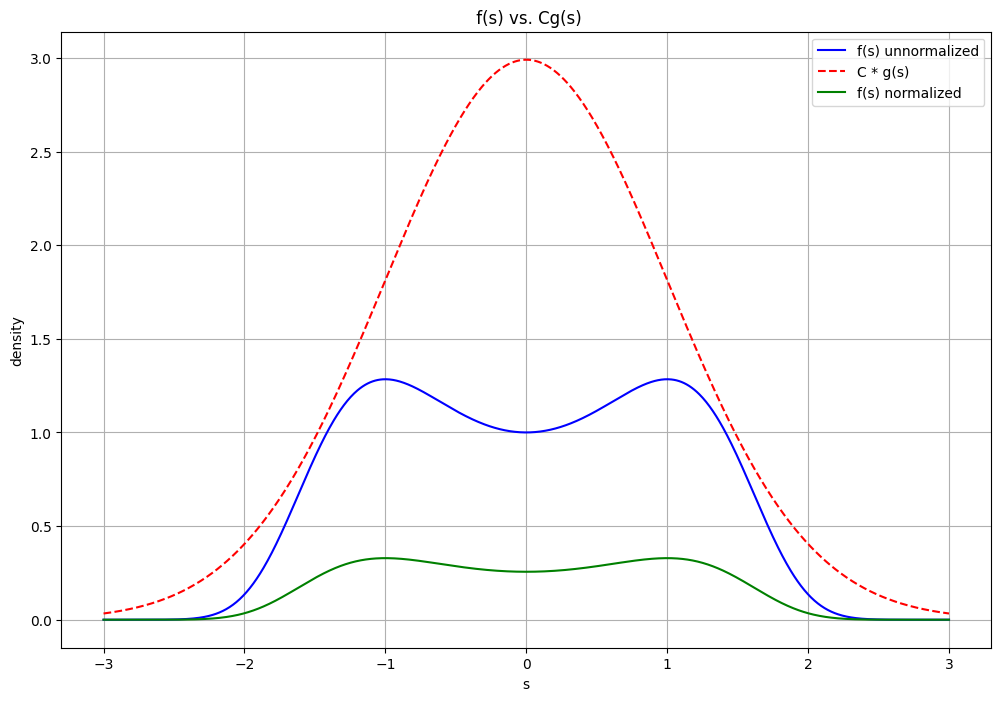

In [7]:
# 创建绘图
s_plot = np.linspace(-3, 3, 1000)
f_plot = f(s_plot)
g_plot = g(s_plot)
Cg_plot = C * g_plot

# 计算归一化的 f(s) 供比较
f_norm_plot = f_normalized(s_plot)

plt.figure(figsize=(12, 8))

# 绘制目标函数 f(s)
plt.plot(s_plot, f_plot, label='f(s) unnormalized', color='blue')

# 绘制提议分布 Cg(s)
plt.plot(s_plot, Cg_plot, label='C * g(s)', color='red', linestyle='--')

# 绘制归一化的 f(s)
plt.plot(s_plot, f_norm_plot, label='f(s) normalized', color='green')

plt.title(' f(s) vs. Cg(s)')
plt.xlabel('s')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

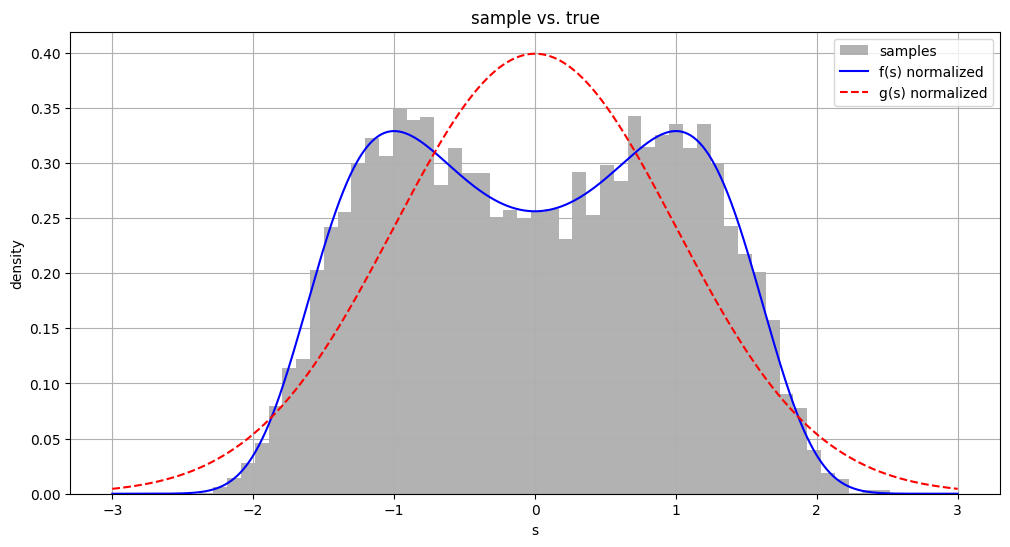

In [8]:
# 绘制采样结果的直方图与真实分布对比
plt.figure(figsize=(12, 6))
plt.hist(samples, bins=50, density=True, alpha=0.6, color='gray', label='samples')

# 绘制归一化的 f(s)
plt.plot(s_plot, f_norm_plot, label='f(s) normalized', color='blue')

# 绘制提议分布 g(s) 作为参考
plt.plot(s_plot, g_plot, label='g(s) normalized', color='red', linestyle='--')

plt.title('sample vs. true')
plt.xlabel('s')
plt.ylabel('density')
plt.legend()
plt.grid(True)
plt.show()

In [9]:


# 进一步评估：计算样本的均值和方差
sample_mean = np.mean(samples)
sample_var = np.var(samples)
print(f"样本均值: {sample_mean:.4f}")
print(f"样本方差: {sample_var:.4f}")

样本均值: 0.0125
样本方差: 1.0375


In [10]:
# 理论均值和方差（通过数值积分计算）
from scipy.integrate import quad

def compute_theoretical_moments():
    # 归一化常数
    integral, _ = quad(f, -np.inf, np.inf)
    
    # 计算期望 E[s]
    integrand_mean = lambda s: s * f(s)
    mean, _ = quad(integrand_mean, -np.inf, np.inf)
    mean /= integral
    
    # 计算 E[s^2]
    integrand_var = lambda s: s**2 * f(s)
    mean_sq, _ = quad(integrand_var, -np.inf, np.inf)
    mean_sq /= integral
    
    var = mean_sq - mean**2
    return mean, var

theoretical_mean, theoretical_var = compute_theoretical_moments()
print(f"理论均值: {theoretical_mean:.4f}")
print(f"理论方差: {theoretical_var:.4f}")


理论均值: 0.0000
理论方差: 1.0418
